In [209]:
# 데이터 준비
import numpy as np
import torch
PI = np.pi
x_full = np.linspace(-10*PI, 10*PI, 1000)
y_full = np.sin(x_full)

x_input = x_full

train_idx = x_full <= 6 * PI
valid_idx = (x_full > 6*PI) & (x_full <= 8*PI)
test_idx = x_full > 8*PI


x_train = torch.FloatTensor(x_input[train_idx]).reshape(-1, 1)
y_train = torch.FloatTensor(y_full[train_idx]).reshape(-1, 1)

x_valid = torch.FloatTensor(x_input[valid_idx]).reshape(-1, 1)
y_valid = torch.FloatTensor(y_full[valid_idx]).reshape(-1, 1)

x_test = torch.FloatTensor(x_input[test_idx]).reshape(-1, 1)
y_test = torch.FloatTensor(y_full[test_idx]).reshape(-1, 1)

In [210]:
import torch.nn as nn

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 8),  
            nn.Tanh(),
            nn.Linear(8, 32),
            nn.Tanh(),
            nn.Linear(32, 8),
            nn.Tanh(),
            nn.Linear(8, 1),
        )
    
    def forward(self, x):
        return self.network(x)

In [211]:
model = DNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=50, factor=0.5)

def train_model(model, x_train, y_train, x_valid, y_valid, epochs=5000):
    train_losses = []
    valid_losses = []
    best_valid_loss = float('inf')
    best_model_path = 'best_model.pth'
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            valid_outputs = model(x_valid)
            valid_loss = criterion(valid_outputs, y_valid)
        
        train_losses.append(loss.item())
        valid_losses.append(valid_loss.item())
        
        scheduler.step(valid_loss)
        
        if valid_loss.item() < best_valid_loss:
            best_valid_loss = valid_loss.item()
            torch.save(model.state_dict(), best_model_path)
            print(f'Epoch {epoch}: New best model saved with valid_loss: {best_valid_loss:.4f}')
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    return train_losses, valid_losses, best_model_path

train_losses, valid_losses, best_model_path = train_model(model, x_train, y_train, x_valid, y_valid)

Epoch 0: New best model saved with valid_loss: 0.6301
Epoch 0, Train Loss: 0.5568, Valid Loss: 0.6301, LR: 0.001000
Epoch 1: New best model saved with valid_loss: 0.6122
Epoch 2: New best model saved with valid_loss: 0.5956
Epoch 3: New best model saved with valid_loss: 0.5804
Epoch 4: New best model saved with valid_loss: 0.5664
Epoch 5: New best model saved with valid_loss: 0.5538
Epoch 6: New best model saved with valid_loss: 0.5427
Epoch 7: New best model saved with valid_loss: 0.5331
Epoch 8: New best model saved with valid_loss: 0.5249
Epoch 9: New best model saved with valid_loss: 0.5181
Epoch 10: New best model saved with valid_loss: 0.5126
Epoch 11: New best model saved with valid_loss: 0.5084
Epoch 12: New best model saved with valid_loss: 0.5052
Epoch 13: New best model saved with valid_loss: 0.5029
Epoch 14: New best model saved with valid_loss: 0.5014
Epoch 15: New best model saved with valid_loss: 0.5005
Epoch 16: New best model saved with valid_loss: 0.4999
Epoch 17: New

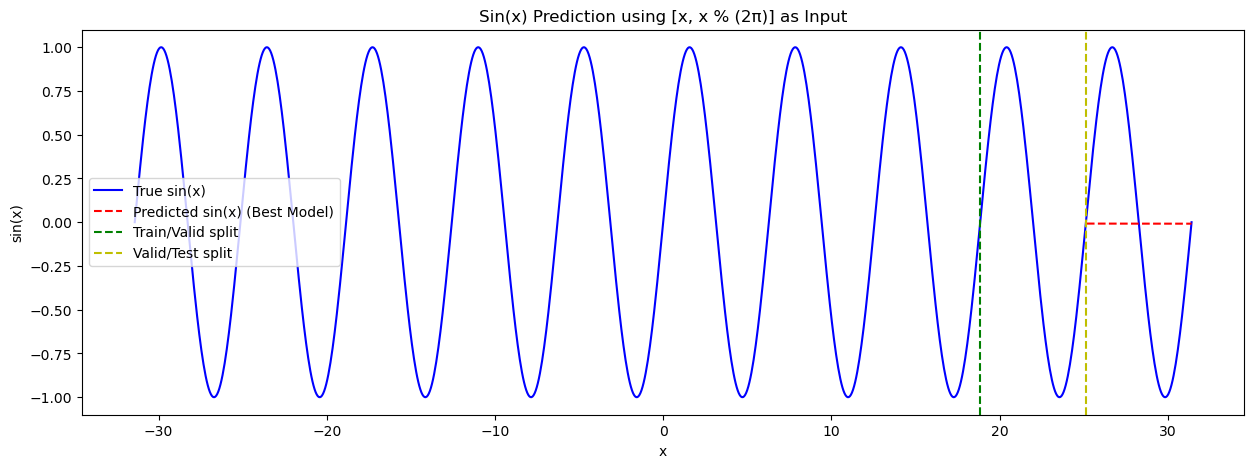

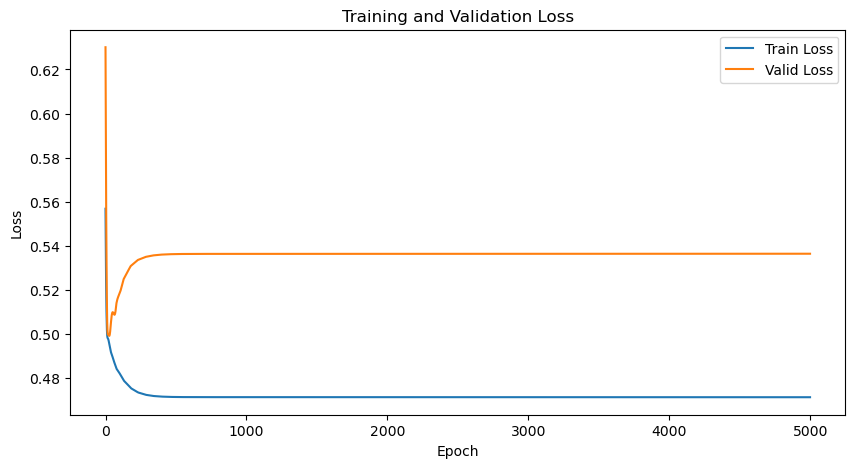

Test Loss of Best Model: 0.4994


In [212]:
import matplotlib.pyplot as plt
best_model = DNN()
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

with torch.no_grad():
    y_pred = best_model(x_test)

# 7. 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(x_full, y_full, 'b-', label='True sin(x)')
plt.plot(x_full[test_idx], y_pred.numpy(), 'r--', label='Predicted sin(x) (Best Model)')
plt.axvline(x=6*PI, color='g', linestyle='--', label='Train/Valid split')
plt.axvline(x=8*PI, color='y', linestyle='--', label='Valid/Test split')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.title('Sin(x) Prediction using [x, x % (2π)] as Input')
plt.show()

# 학습 곡선 플롯
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 테스트 성능 평가
with torch.no_grad():
    test_outputs = best_model(x_test)
    test_loss = criterion(test_outputs, y_test)
print(f'Test Loss of Best Model: {test_loss.item():.4f}')

Epoch 0: New best model saved with valid_loss: 0.5294
Epoch 0, Train Loss: 0.5582, Valid Loss: 0.5294, LR: 0.001000
Epoch 1: New best model saved with valid_loss: 0.5194
Epoch 2: New best model saved with valid_loss: 0.5105
Epoch 3: New best model saved with valid_loss: 0.5026
Epoch 4: New best model saved with valid_loss: 0.4956
Epoch 5: New best model saved with valid_loss: 0.4894
Epoch 6: New best model saved with valid_loss: 0.4840
Epoch 7: New best model saved with valid_loss: 0.4794
Epoch 8: New best model saved with valid_loss: 0.4756
Epoch 9: New best model saved with valid_loss: 0.4725
Epoch 10: New best model saved with valid_loss: 0.4701
Epoch 11: New best model saved with valid_loss: 0.4684
Epoch 12: New best model saved with valid_loss: 0.4672
Epoch 13: New best model saved with valid_loss: 0.4664
Epoch 14: New best model saved with valid_loss: 0.4661
Epoch 15: New best model saved with valid_loss: 0.4660
Epoch 22: New best model saved with valid_loss: 0.4654
Epoch 23: New

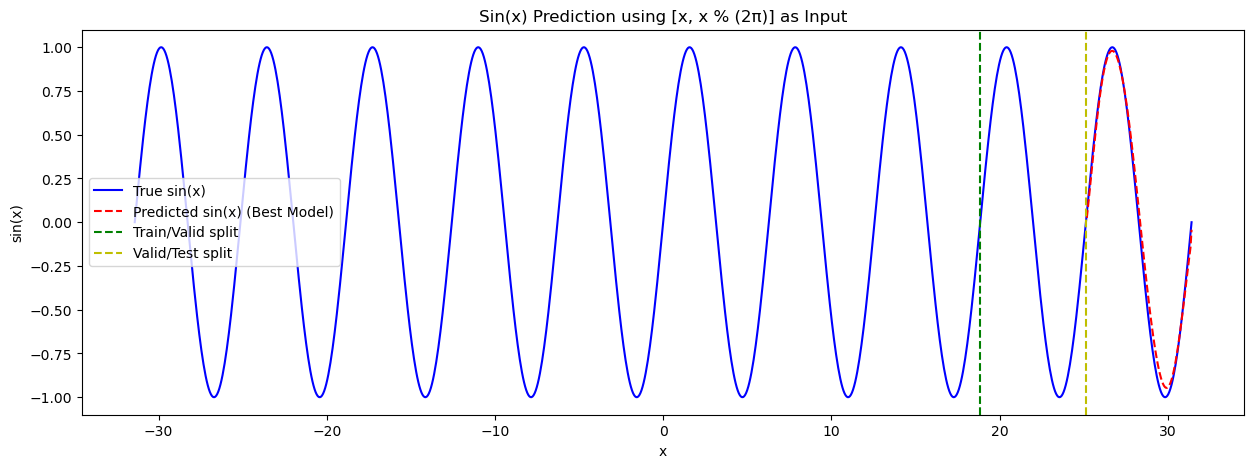

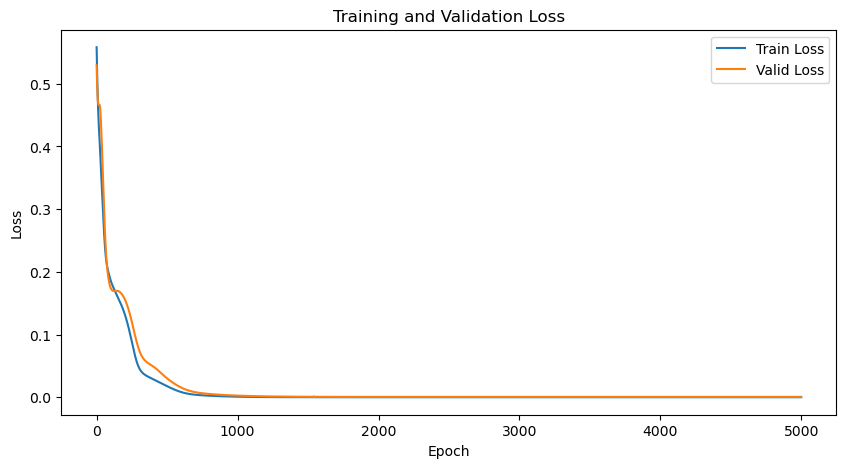

Test Loss of Best Model: 0.0031


In [214]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
x_full = np.linspace(-10*PI, 10*PI, 1000)
y_full = np.sin(x_full)

x_full_int = x_full //  (2*PI)
x_full_mod = x_full % (2*PI)

x_input = np.stack([x_full_int, x_full_mod], axis=1)  # shape: (1000, 2)

train_idx = x_full <= 6*PI
valid_idx = (x_full > 6*PI) & (x_full <= 8*PI)
test_idx = x_full > 8*PI

x_train = torch.FloatTensor(x_input[train_idx])  # shape: (train_size, 2)
y_train = torch.FloatTensor(y_full[train_idx]).reshape(-1, 1)
x_valid = torch.FloatTensor(x_input[valid_idx])  # shape: (valid_size, 2)
y_valid = torch.FloatTensor(y_full[valid_idx]).reshape(-1, 1)
x_test = torch.FloatTensor(x_input[test_idx])    # shape: (test_size, 2)
y_test = torch.FloatTensor(y_full[test_idx]).reshape(-1, 1)

import torch.nn as nn

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 8),   # 입력차원이 2차원이므로 2로 바꿔야함
            nn.Tanh(),
            nn.Linear(8, 32),
            nn.Tanh(),
            nn.Linear(32, 8),
            nn.Tanh(),
            nn.Linear(8, 1),
        )
    
    def forward(self, x):
        return self.network(x)

model = DNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=50, factor=0.5)

def train_model(model, x_train, y_train, x_valid, y_valid, epochs=5000):
    train_losses = []
    valid_losses = []
    best_valid_loss = float('inf')
    best_model_path = 'best_model.pth'
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            valid_outputs = model(x_valid)
            valid_loss = criterion(valid_outputs, y_valid)
        
        train_losses.append(loss.item())
        valid_losses.append(valid_loss.item())
        
        scheduler.step(valid_loss)
        
        if valid_loss.item() < best_valid_loss:
            best_valid_loss = valid_loss.item()
            torch.save(model.state_dict(), best_model_path)
            print(f'Epoch {epoch}: New best model saved with valid_loss: {best_valid_loss:.4f}')
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    return train_losses, valid_losses, best_model_path

train_losses, valid_losses, best_model_path = train_model(model, x_train, y_train, x_valid, y_valid)

import matplotlib.pyplot as plt
best_model = DNN()
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

with torch.no_grad():
    y_pred = best_model(x_test)

# 7. 결과 시각화
plt.figure(figsize=(15, 5))
plt.plot(x_full, y_full, 'b-', label='True sin(x)')
plt.plot(x_full[test_idx], y_pred.numpy(), 'r--', label='Predicted sin(x) (Best Model)')
plt.axvline(x=6*PI, color='g', linestyle='--', label='Train/Valid split')
plt.axvline(x=8*PI, color='y', linestyle='--', label='Valid/Test split')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.title('Sin(x) Prediction using [x, x % (2π)] as Input')
plt.show()

# 학습 곡선 플롯
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 테스트 성능 평가
with torch.no_grad():
    test_outputs = best_model(x_test)
    test_loss = criterion(test_outputs, y_test)
print(f'Test Loss of Best Model: {test_loss.item():.4f}')